In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [89]:
df = pd.read_csv('insurance.csv')

In [90]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
2,28,male,33.000,3,no,southeast,4449.46200
461,42,male,30.000,0,yes,southwest,22144.03200
1159,32,female,41.100,0,no,southwest,3989.84100
1123,27,female,32.395,1,no,northeast,18903.49141
106,19,female,28.400,1,no,southwest,2331.51900


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [92]:
df.shape

(1338, 7)

In [93]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [94]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<Axes: xlabel='bmi'>

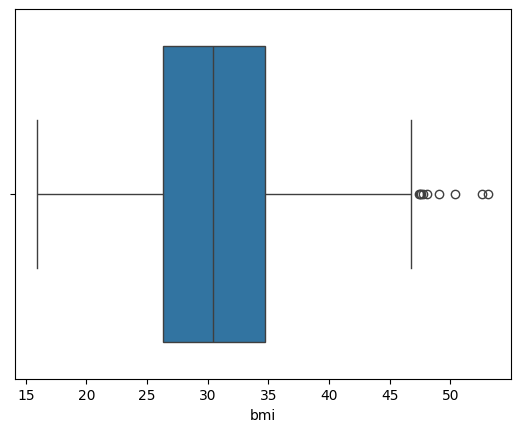

In [95]:
sns.boxplot(data=df , x = 'bmi')

<Axes: xlabel='bmi', ylabel='Density'>

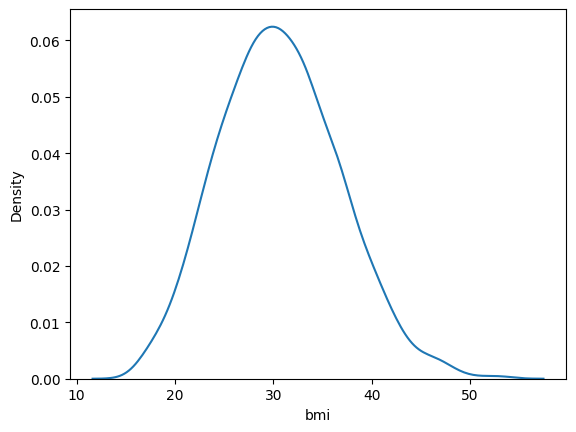

In [96]:
sns.kdeplot(df['bmi'])

In [97]:
# BMI

q1 = np.quantile(df['bmi'] , 0.25)
q3 = np.quantile(df['bmi'] , 0.75)
iqr = q3 - q1

In [98]:
min = q1 - 1.5 * iqr

In [99]:
min

np.float64(13.7)

In [100]:
max = q3 + 1.5 * iqr

In [101]:
max

np.float64(47.290000000000006)

In [102]:
df['bmi'][df['bmi'] > max] = max

/tmp/ipython-input-3503659393.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['bmi'][df['bmi'] > max] = max
/tmp/ipython-input-3503659393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

<Axes: xlabel='bmi'>

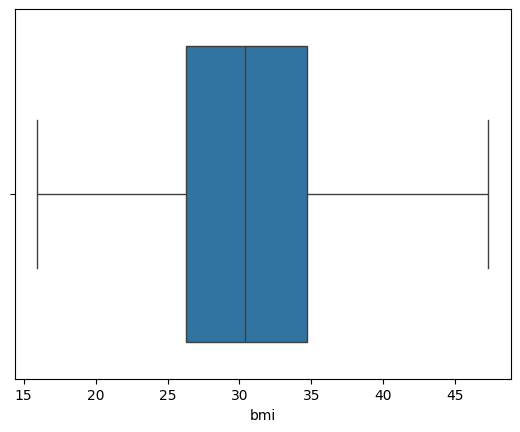

In [103]:
sns.boxplot(data=df , x = 'bmi')

<Axes: xlabel='bmi', ylabel='Density'>

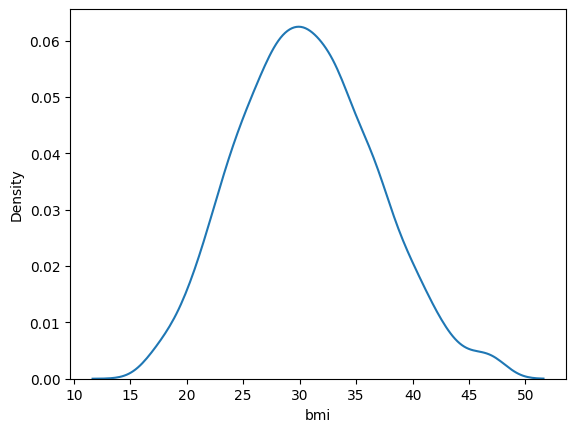

In [104]:
sns.kdeplot(df['bmi'])

In [105]:
# Encoding
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
from sklearn.model_selection import train_test_split
X = df.drop('charges' , axis=1)
Y = df['charges']

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.3 , random_state=42)

In [107]:
X_train

,age,sex,bmi,children,smoker,region
332,61,female,31.160,0,no,northwest
355,46,male,27.600,0,no,southwest
138,54,female,31.900,3,no,southeast
381,55,male,30.685,0,yes,northeast
292,25,male,45.540,2,yes,southeast
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.290,2,yes,southwest


In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
from sklearn.preprocessing import OrdinalEncoder

In [110]:
from sklearn.preprocessing import OneHotEncoder

In [111]:
tr1 = ColumnTransformer([
    ('sc' , StandardScaler() , ['age' , 'bmi']),
    ('ordinal', OrdinalEncoder(categories=[['no', 'yes']]), ['smoker']),
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), ['sex', 'region'])
], remainder='passthrough')

tr1.fit(X_train)
X_train_trf = tr1.transform(X_train)
X_test_trf = tr1.transform(X_test)

In [112]:
from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
tr2 = LinearRegression()
# tr3 = DecisionTreeRegressor()


In [113]:
pipe = Pipeline([
    ('tr1' , tr1),
    ('tr2' , tr2)
])
# pipe1 = Pipeline([
#     ('tr1' , tr1),
#     ('tr3' , tr3)
# ])

In [114]:
pipe.fit(X_train , Y_train)
# pipe1.fit(X_train , Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('tr1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  ['age', 'bmi']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'yes']]),
                                                  ['smoker']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex', 'region'])])),
                ('tr2', LinearRegression())])

In [115]:
import pickle

with open('model_pipelines.pkl', 'wb') as f:
    pickle.dump(pipe, f)


In [116]:
from sklearn.metrics import r2_score
y_pred = pipe.predict(X_test)
# y_pred1 = pipe1.predict(X_test)

print(r2_score(Y_test , y_pred))
# print(r2_score(Y_test , y_pred1))


0.7688442326877625
